In [28]:
from slmfunctions.dependencies import *
from slmfunctions.settings import *
from slmfunctions.simulation import *
from slmfunctions.imageprocessing import *
from slmfunctions.phaseretrieval import *
from slmfunctions.slmsuite.slmsuite.holography.analysis import *
from slmfunctions.slmsuite.slmsuite.hardware.slms.meadowlark import Meadowlark
# Meadowlark.info(verbose = True)
from slmfunctions.slmsuite.slmsuite.hardware.cameras.thorlabs import ThorCam
ThorCam.info(verbose=True)
from slmfunctions.slmsuite.slmsuite.hardware.cameraslms import FourierSLM

# GLOBAL VARIABLES
numpixels = 1300
slmwidth = 1200
slmheight = 1920

RuntimeError: thorlabs.py: TLCameraSDK() open failed. Is thorlabs_tsi_sdk installed? Are the .dlls in the directory added by configure_tlcam_dll_path? Sometimes adding the .dlls to the working directory can help.

In [ ]:
slm = Meadowlark(slm_number =1, _number = 1, wav_um = .631, settle_time_s=.3)
cam = ThorCam(serial="", verbose=True)
fs = FourierSLM(cam, slm)
fs.load_wavefront_calibration(plot=True)


In [9]:
imgname = f"3by3_9spacing_mag3" # LOOKUP NAME
load_dir = r'C:\cleen\nsong\2-Research\UAC Research\Github\Ultracold-Research\GWS-Summer2024\storage'  ## filepath for storing phase patterns
phaseimg_path = os.path.join(load_dir, f"{imgname}_phase.bmp")
intimg_path = os.path.join(load_dir, f"{imgname}_virtualint.jpg")

phaseimg = cp.zeros((numpixels, numpixels))
slmphase = cp.array(Image.open(phaseimg_path).convert('L')) / 255*2*cp.pi - cp.pi
phaseimg = slmphase[0:slmwidth, slmheight // 2 - slmwidth // 2: slmheight // 2 + slmwidth // 2]
intensityimg = (cp.array(Image.open(intimg_path).convert('L')) / 255)


In [10]:
precisetweezerim = remove0thorder(simulatefourier(zeropad(phaseimg, 2600), magnification=1))


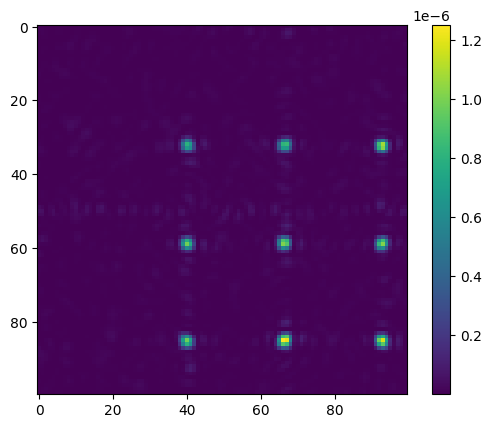

In [25]:
plt.imshow(precisetweezerim[1850:1950, 3000:3100])
plt.colorbar()